##Задача классификации

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gkalpolukcu/knn-algorithm-dataset")

print("Path to dataset files:", path)

100%|██████████| 48.7k/48.7k [00:00<00:00, 23.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1


Accuracy: 0.9790209790209791


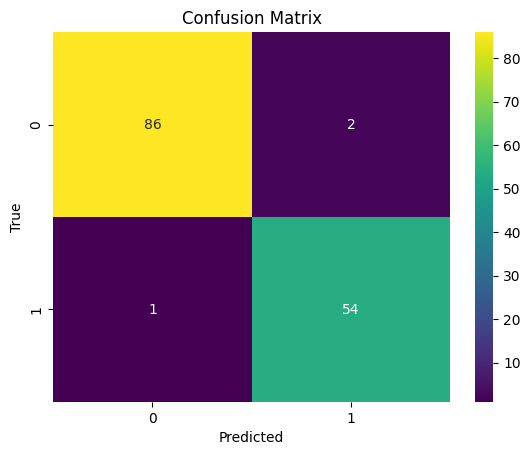

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.96      0.98      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

ROC AUC Score: 0.9979338842975207


In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv')
data = data.drop(['id', 'Unnamed: 32'], axis=1)

data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred = gb.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, gb.predict_proba(X_test_scaled)[:, 1])
print(f'ROC AUC Score: {roc_auc}')


###Улучшенный бейзлайн

Accuracy: 0.9790209790209791
ROC AUC Score: 0.9979338842975207
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.96      0.98      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



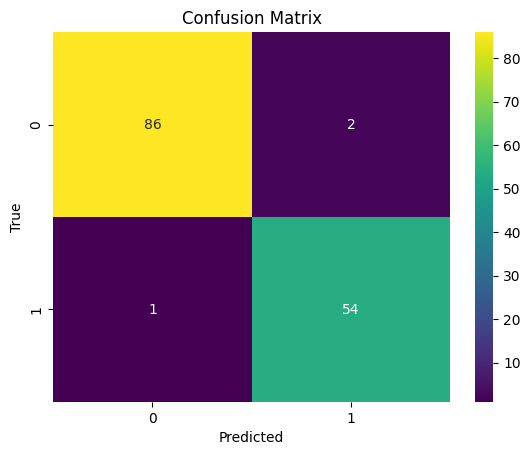

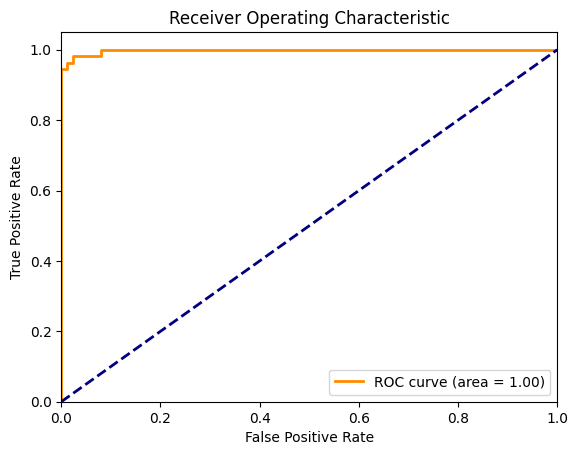

Accuracy with custom threshold (0.5): 0.9790209790209791
ROC AUC Score with custom threshold: 0.9795454545454546


In [5]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv')
data = data.drop(['id', 'Unnamed: 32'], axis=1)

data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred = gb.predict(X_test_scaled)
y_pred_proba = gb.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

y_pred_custom = (y_pred_proba > 0.5).astype(int)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy with custom threshold (0.5): {accuracy_custom}")

roc_auc_custom = roc_auc_score(y_test, y_pred_custom)
print(f'ROC AUC Score with custom threshold: {roc_auc_custom}')


##Задача регрессии

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/netflix-imdb-scores")

print("Path to dataset files:", path)

100%|██████████| 699k/699k [00:00<00:00, 57.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

X = data[['release_year', 'runtime', 'imdb_votes']]
y = data['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.1166374236511103
Mean Absolute Error: 0.7831419959936712
R² Score: 0.21581770404051004


###Улучшенный бейзлайн

Добавлены признаки, оптимизированы гиперпараметры с помощью GridSearchCV

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

X = data[['release_year', 'runtime', 'imdb_votes', 'type', 'age_certification']]
y = data['imdb_score']

X_encoded = pd.get_dummies(X, columns=['type', 'age_certification'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[['release_year', 'runtime', 'imdb_votes']] = scaler.fit_transform(X_train[['release_year', 'runtime', 'imdb_votes']])
X_test[['release_year', 'runtime', 'imdb_votes']] = scaler.transform(X_test[['release_year', 'runtime', 'imdb_votes']])

gb_regressor = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(gb_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f'Mean Squared Error (CV): {-cv_scores.mean()}')

Mean Squared Error: 1.0866720904775327
Mean Absolute Error: 0.7673753120244813
R² Score: 0.2368614943251075
Mean Squared Error (CV): 0.9988363096541942


##Самостоятельно имплементированные модели

Accuracy: 0.9473684210526315
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

ROC AUC: 0.9434981984932852


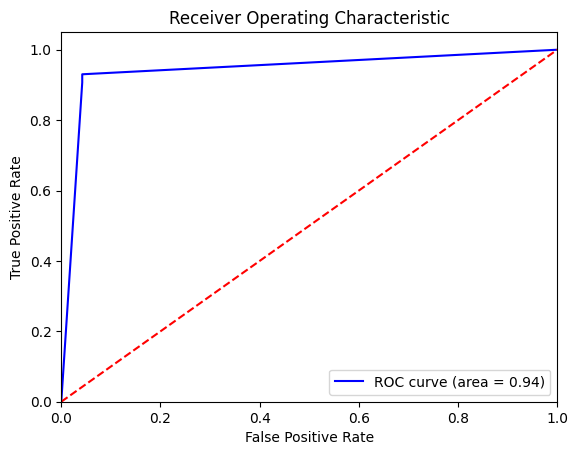

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

class CustomGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            model = DecisionTreeClassifier(max_depth=self.max_depth)
            model.fit(X, (residuals > 0).astype(int))
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        return (y_pred > 0.5).astype(int), y_pred

data = pd.read_csv('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv')
data = data.drop(['id', 'Unnamed: 32'], axis=1)

data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = CustomGradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)

gb_classifier.fit(X_train, y_train)

y_pred, y_pred_continuous = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_continuous)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


###Улучшенный бейзлайн

Accuracy: 0.9473684210526315
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

ROC AUC: 0.9430068784801834


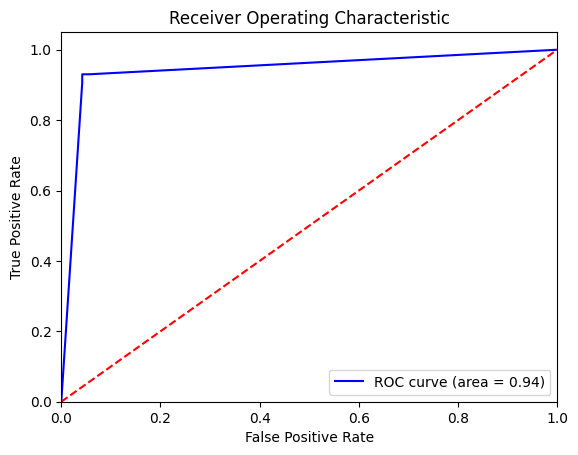

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

class CustomGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            model = DecisionTreeClassifier(max_depth=self.max_depth)
            model.fit(X, residuals > 0)
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        return (y_pred > 0.5).astype(int), y_pred

data = pd.read_csv('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv')
data = data.drop(['id', 'Unnamed: 32'], axis=1)

data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = CustomGradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=5)

gb_classifier.fit(X_train, y_train)

y_pred, y_pred_continuous = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_continuous)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class CustomGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residuals)
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        return y_pred

data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

X = data[['release_year', 'runtime', 'imdb_votes']]
y = data['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_regressor = CustomGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.1196998368136704
Mean Absolute Error: 0.7851913665169384
R² Score: 0.21366705949454756


###Улучшенный бейзлайн

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class CustomGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residuals)
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        return y_pred

data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

X = data[['release_year', 'runtime', 'imdb_votes', 'type', 'age_certification']]
y = data['imdb_score']

X_encoded = pd.get_dummies(X, columns=['type', 'age_certification'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

gb_regressor = CustomGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.065489529087909
Mean Absolute Error: 0.7573257149894902
R² Score: 0.2517373969887533


Самостоятельная реализация показала себя хуже, чем встроенные модели. Но для второго датасета результаты все равно лучше, чем у предыдущих моделей